In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))
from synth_dim_model import *

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import matplotlib.colors as mcolors

import warnings
warnings.filterwarnings("ignore")

In [89]:
N = 2
M = 3

J = 0.1
V = -1

energies = []
wavefunctions = []

mu_V_ratios = np.linspace(2,0,1000)

for mu_V_ratio in mu_V_ratios:
    
    mu = V*mu_V_ratio
    
    H = construct_initial_hamiltonian(N, M, mu) + construct_hamiltonian(N, M, J, V)
        
    eigenvalues, eigenvectors = exact_diagonalize(H)
        
    energies.append(eigenvalues)
    wavefunctions.append(eigenvectors)
    
        
energies = np.array(energies)
wavefunctions = np.array(wavefunctions)

Text(0, 0.5, 'Energy')

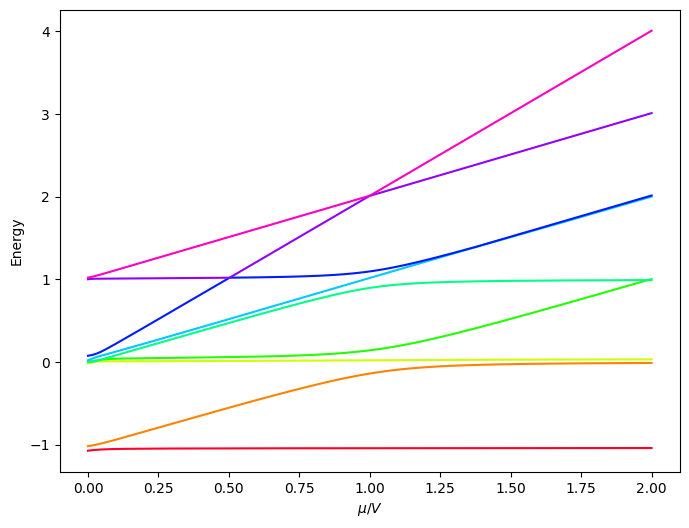

In [90]:
fig, ax = plt.subplots(figsize = (8,6))

colors = get_cmap("gist_rainbow", M**N)

for i in range(M**N):
    
    ax.plot(mu_V_ratios, energies[:,i], color = colors(i))
    
ax.set_xlabel("$\mu/V$")
ax.set_ylabel("Energy")

In [83]:
x1 = np.real(np.around(wavefunctions[500][0],3))
print(x1)

[-0.    -0.    -0.003 -0.    -0.013 -0.707 -0.003 -0.707 -0.013]


In [84]:
x2 = np.real(np.around(wavefunctions[500][1],3))
print(x2)

[ 0.005  0.513  0.005  0.513  0.689 -0.006  0.005 -0.006 -0.009]


In [85]:
ham = construct_hamiltonian(N,M,J=1,V=0) # 0.5*construct_initial_hamiltonian(N,M,mu=1)
print(np.real(np.around(ham,2)))

[[ 0. -1.  0. -1.  0.  0.  0.  0.  0.]
 [-1.  0. -1.  0. -1.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0. -1.  0.  0.  0.]
 [-1.  0.  0.  0. -1.  0. -1.  0.  0.]
 [ 0. -1.  0. -1.  0. -1.  0. -1.  0.]
 [ 0.  0. -1.  0. -1.  0.  0.  0. -1.]
 [ 0.  0.  0. -1.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  0. -1.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  0.]]


In [86]:
np.real(np.vdot(x1, ham @ x2))


0.9846579999999998

In [87]:
a = np.matmul(ham,x2)
print(f"unnormalized: \n{a}\n")

a = a/np.linalg.norm(a)
print(f"normalized: \n{a}")


unnormalized: 
[-1.026+0.j -0.699+0.j -0.507+0.j -0.699+0.j -1.014+0.j -0.685+0.j
 -0.507+0.j -0.685+0.j  0.012+0.j]

normalized: 
[-0.48308351+0.j -0.3291183 +0.j -0.2387167 +0.j -0.3291183 +0.j
 -0.47743341+0.j -0.32252651+0.j -0.2387167 +0.j -0.32252651+0.j
  0.0056501 +0.j]


In [88]:
print(x1)

[-0.    -0.    -0.003 -0.    -0.013 -0.707 -0.003 -0.707 -0.013]
